In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.EDA on cities

In [0]:
df_gen=pd.read_csv('/content/drive/My Drive/hotstar_cities_200000_u.csv')

In [0]:
df_gen.head()

,Unnamed: 0,Train_ID,cities,segment,lund,mulund west,bhiwandi,nottingham,kathmandu,santa clara,sungai petani,herouville-saint-clair,navsari,kottayam,surbiton,paderborn,harbin,nagpur,camden,takapuna,pescara,jiddah,kunming,yiwu,barueri,altstadt-lehel,campulung,prabhadevi,dhaka,savona,luxembourg,friedrichshain,galle,dandenong,tirupati,nizhniy novgorod,kyiv,bhandup west,leicester,sao paulo,...,allahabad,amritsar,koblenz,firozabad,al jizah,zahedan,jagdalpur,sri aman,surrey,ash shariqah,hoorn,semarang,strathfield,stokmarknes,laghouat,willemstad,thiagarajar college,montreal,tezpur,al qahirah,arezzo,nedumangad,panihati,tokyo,monmouth junction,cyberjaya,vilvoorde,dahod,cedar falls,westlinton,tremblay-en-france,sunnyvale,raman,barpeta,karlskrona,parel,raghogarh,jerusalem,appingedam,City_Times
0,0,train-121672,"delhi:3492,mumbai:64",neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3556
1,1,train-121673,"ahmedabad:56666,mumbai:26989",neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83655
2,2,train-121670,navi mumbai:29400,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29400
3,3,train-121671,"chennai:77,navi mumbai:4005,mumbai:0",neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4082
4,4,train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8528


In [0]:
df_gen=df_gen.fillna(0)

In [0]:
df_gen.head()

,Unnamed: 0,Train_ID,cities,segment,lund,mulund west,bhiwandi,nottingham,kathmandu,santa clara,sungai petani,herouville-saint-clair,navsari,kottayam,surbiton,paderborn,harbin,nagpur,camden,takapuna,pescara,jiddah,kunming,yiwu,barueri,altstadt-lehel,campulung,prabhadevi,dhaka,savona,luxembourg,friedrichshain,galle,dandenong,tirupati,nizhniy novgorod,kyiv,bhandup west,leicester,sao paulo,...,allahabad,amritsar,koblenz,firozabad,al jizah,zahedan,jagdalpur,sri aman,surrey,ash shariqah,hoorn,semarang,strathfield,stokmarknes,laghouat,willemstad,thiagarajar college,montreal,tezpur,al qahirah,arezzo,nedumangad,panihati,tokyo,monmouth junction,cyberjaya,vilvoorde,dahod,cedar falls,westlinton,tremblay-en-france,sunnyvale,raman,barpeta,karlskrona,parel,raghogarh,jerusalem,appingedam,City_Times
0,0,train-121672,"delhi:3492,mumbai:64",neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3556
1,1,train-121673,"ahmedabad:56666,mumbai:26989",neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83655
2,2,train-121670,navi mumbai:29400,neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29400
3,3,train-121671,"chennai:77,navi mumbai:4005,mumbai:0",neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4082
4,4,train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8528


In [0]:
df_gen=df_gen.drop('Unnamed: 0',axis=1)

## Univariate Analysis on cities

In [0]:
## Count Of Cities
count=df_gen.iloc[:,4:-1].apply(lambda x:x==1).sum().sort_values(ascending=False).reset_index(name='count')

<Figure size 1080x720 with 0 Axes>

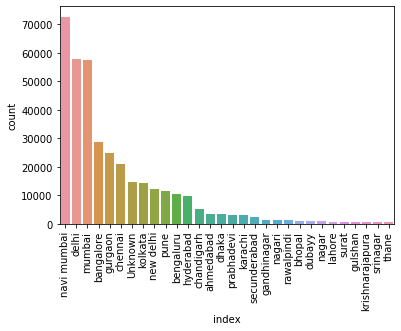

<Figure size 1080x720 with 0 Axes>

In [0]:
sns.barplot('index','count',data=count.head(30),orient='v')
plt.xticks(rotation=90)
plt.figure(figsize=(15,10))

### Inference:
- From above barplot it can be clearly visible that most of the users are from Navi mumbai,Delhi,Mumbai,Banglore,gurgaon,chennai.
- Most of the visitors comes from the top 20 cities
- Other than that there is a column named Unknown which can represent anything which needs to be dropped
- This cleaning will be done in the main csv file

## Univariate Analysis on city's time

In [0]:
time=pd.read_csv('/content/drive/My Drive/hotstar_cities_200000.csv')

In [0]:
time=time.fillna(0)

In [0]:
time.head()

,Unnamed: 0,Train_ID,cities,segment,lajpat nagar,patiala,janakpur,kashipur,kobe,fatih,kobenhavn,yiwu,owen sound,paramus,astana,thiruvananthapuram,sankt-peterburg,udaipur,aligarh,montreal,khanna,madurai,vasant kunj,aachen,aarhus,uzhhorod,yavatmal,shenzhen,lille,newark,austin,poway,pinole,cotonou,mulund west,ann arbor,jinan,jinjiang,roma,helsingborg,...,time_montreux,time_medellin,time_pune,time_cuenca,time_gulshan,time_powai,time_stokmarknes,time_wolverhampton,time_soborg,time_chuo-ku (tokyo),time_bentong,time_grenoble,time_wallington,time_kinshasa,time_saint paul,time_kaithal,time_brest,time_surry hills,time_orland park,time_temerloh,time_saratov,time_box,time_gazipur,time_gajraula,time_rodgau,time_coventry,time_ranchi,time_berry,time_poitiers,time_muenchen,time_paramaribo,time_alessandria,time_shenyang,time_nirmal,time_puteaux,time_burlington,time_seattle,time_christchurch,time_angeles city,time_mandi
0,0,train-121672,"delhi:3492,mumbai:64",neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,train-121673,"ahmedabad:56666,mumbai:26989",neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,train-121670,navi mumbai:29400,neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,train-121671,"chennai:77,navi mumbai:4005,mumbai:0",neg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
time_mean=time[list(time.iloc[:,1362:].columns)].describe().T.reset_index()[['index','mean']]

In [0]:
time_mean=time_mean.sort_values(by='mean',ascending=False)

<Figure size 1080x720 with 0 Axes>

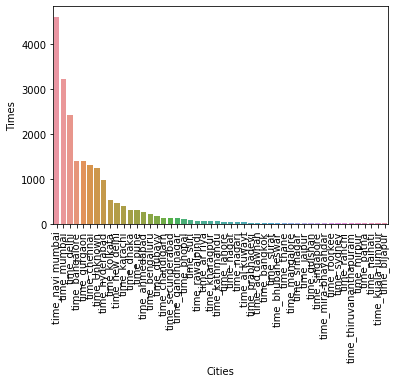

<Figure size 1080x720 with 0 Axes>

In [0]:
sns.barplot('index','mean',data=time_mean.head(50),orient='v')
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Times')v
plt.figure(figsize=(15,10))

## Bivariate analysis on cities and Target on top 20 cities

In [0]:
name=list(count['index'].head(20))
name.append('segment')

In [0]:
time[name].head()

,navi mumbai,delhi,mumbai,bangalore,gurgaon,chennai,Unknown,kolkata,new delhi,pune,bengaluru,hyderabad,chandigarh,ahmedabad,dhaka,prabhadevi,karachi,secunderabad,gandhinagar,nagari,segment
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pos


IndexError: ignored

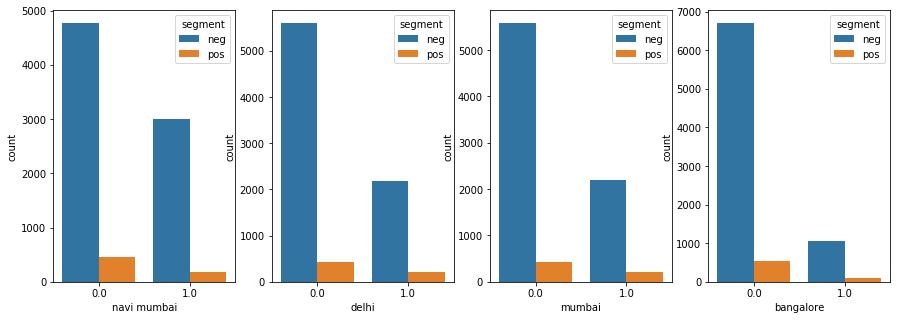

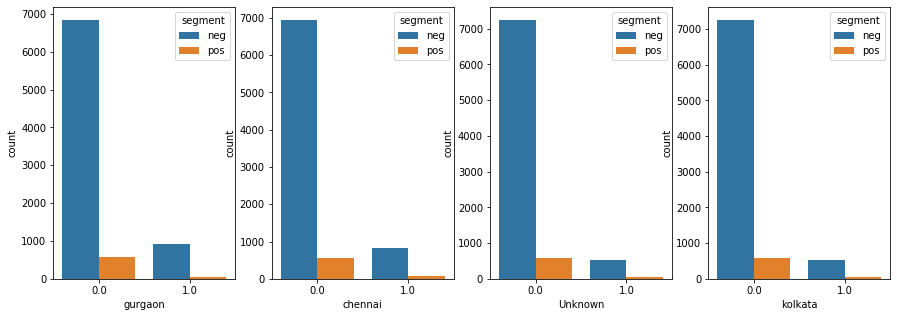

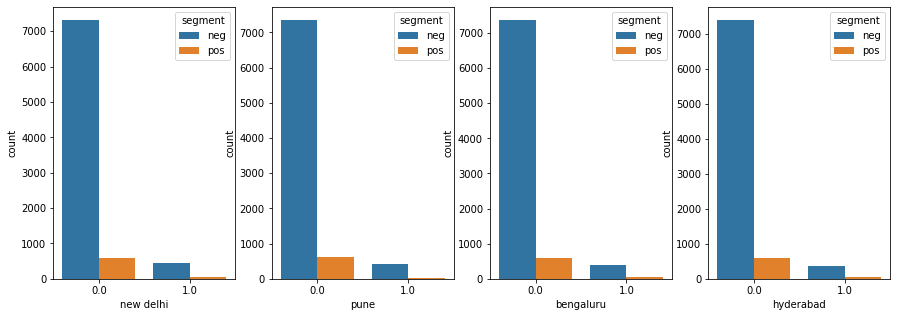

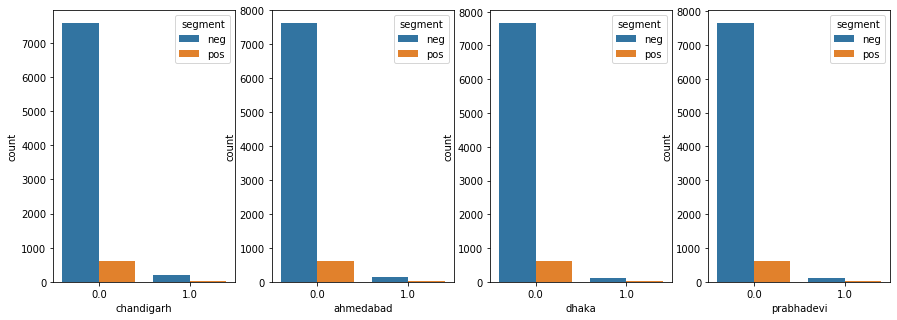

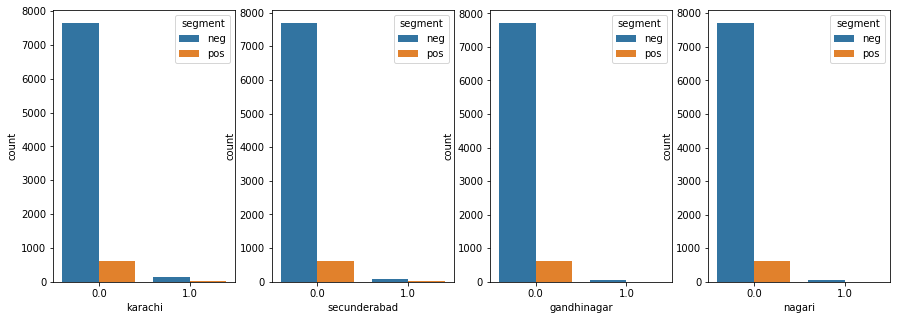

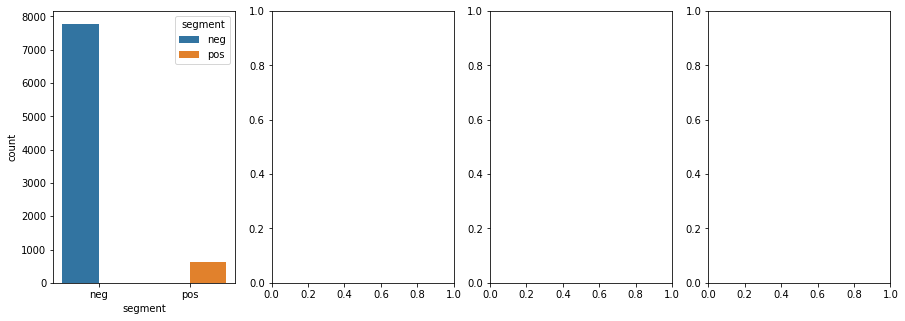

In [0]:
for i in range(0,len(name),4):
  fig,ax=plt.subplots(1,4,figsize=(15,5))
  sns.countplot(time[name[i]],hue=time['segment'],ax=ax[0])
  sns.countplot(time[name[i+1]],hue=time['segment'],ax=ax[1])
  sns.countplot(time[name[i+2]],hue=time['segment'],ax=ax[2])
  sns.countplot(time[name[i+3]],hue=time['segment'],ax=ax[3])
  #sns.countplot(time[name[i+4]],ax=ax[4])

In [0]:
print(df_gen[name[0]].groupby([df_gen['segment'],df_gen[name[0]]]).count())
print(df_gen[name[1]].groupby([df_gen['segment'],df_gen[name[1]]]).count())
print(df_gen[name[2]].groupby([df_gen['segment'],df_gen[name[2]]]).count())
print(df_gen[name[3]].groupby([df_gen['segment'],df_gen[name[3]]]).count())
print(df_gen[name[4]].groupby([df_gen['segment'],df_gen[name[4]]]).count())
print(df_gen[name[5]].groupby([df_gen['segment'],df_gen[name[5]]]).count())
print(df_gen[name[6]].groupby([df_gen['segment'],df_gen[name[6]]]).count())
print(df_gen[name[7]].groupby([df_gen['segment'],df_gen[name[7]]]).count())
print(df_gen[name[8]].groupby([df_gen['segment'],df_gen[name[8]]]).count())
print(df_gen[name[9]].groupby([df_gen['segment'],df_gen[name[9]]]).count())
print(df_gen[name[10]].groupby([df_gen['segment'],df_gen[name[10]]]).count())
print(df_gen[name[11]].groupby([df_gen['segment'],df_gen[name[11]]]).count())
print(df_gen[name[12]].groupby([df_gen['segment'],df_gen[name[12]]]).count())
print(df_gen[name[13]].groupby([df_gen['segment'],df_gen[name[13]]]).count())
print(df_gen[name[14]].groupby([df_gen['segment'],df_gen[name[14]]]).count())
print(df_gen[name[15]].groupby([df_gen['segment'],df_gen[name[15]]]).count())
print(df_gen[name[16]].groupby([df_gen['segment'],df_gen[name[16]]]).count())
print(df_gen[name[17]].groupby([df_gen['segment'],df_gen[name[17]]]).count())
print(df_gen[name[18]].groupby([df_gen['segment'],df_gen[name[18]]]).count())
print(df_gen[name[19]].groupby([df_gen['segment'],df_gen[name[19]]]).count())

### Inference:
- Cities with highest conversion is Mumbai

## 2.EDA on genres

In [0]:
df_genre=pd.read_csv('/content/drive/My Drive/Hotstar_genre_20000_u.csv')

In [0]:
df_genre.head()

,Unnamed: 0,Train_ID,genres,segment,Family,Travel,Romance,Athletics,Teen,Kids,Cricket,Crime,Drama,Table Tennis,LiveTV,Tennis,Football,Reality,Documentary,Kabaddi,Formula1,Swimming,Awards,Boxing,Science,NA,Thriller,Volleyball,IndiaVsSa,FormulaE,Sport,Horror,Hockey,TalkShow,Wildlife,Badminton,Comedy,Mythology,Action,Genres_Times
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79",neg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3554
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,83637
2,2,train-121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,29398
3,3,train-121671,"Romance:77,Drama:122,Cricket:3883",neg,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4082
4,4,train-121676,TalkShow:8529,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,8529


In [0]:
df_genre=df_genre.fillna(0)

In [0]:
df_genre.head()

,Unnamed: 0,Train_ID,genres,segment,Family,Travel,Romance,Athletics,Teen,Kids,Cricket,Crime,Drama,Table Tennis,LiveTV,Tennis,Football,Reality,Documentary,Kabaddi,Formula1,Swimming,Awards,Boxing,Science,NA,Thriller,Volleyball,IndiaVsSa,FormulaE,Sport,Horror,Hockey,TalkShow,Wildlife,Badminton,Comedy,Mythology,Action,Genres_Times
0,0,train-121672,"Drama:6,Cricket:3469,Wildlife:79",neg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3554
1,1,train-121673,"Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,83637
2,2,train-121670,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,29398
3,3,train-121671,"Romance:77,Drama:122,Cricket:3883",neg,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4082
4,4,train-121676,TalkShow:8529,pos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8529


In [0]:
df_genre=df_genre.drop('Unnamed: 0',axis=1)

## Univariate analysis

In [0]:
## Count Of genre
count=df_genre.iloc[:,3:-1].apply(lambda x:x==1).sum().sort_values(ascending=False).reset_index(name='count')

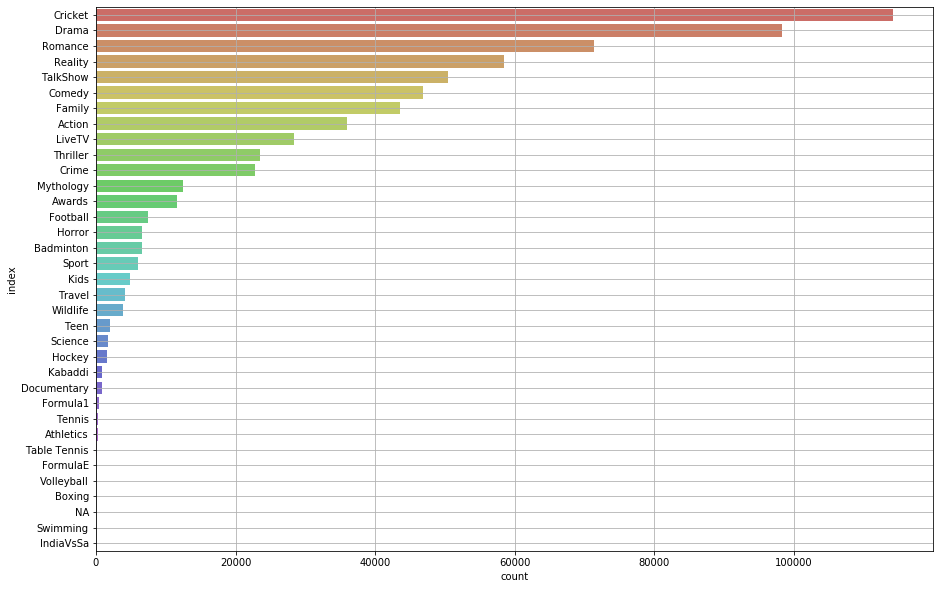

In [0]:
plt.figure(figsize=(15,10))
sns.barplot(count['count'],count['index'],orient='h',palette='hls')
plt.grid()
plt.show()

### Inference:
- From above barplot the most viewed genre is cricket
- Other than that there are some faulty data NA
- This cleaning will be done in the main csv file

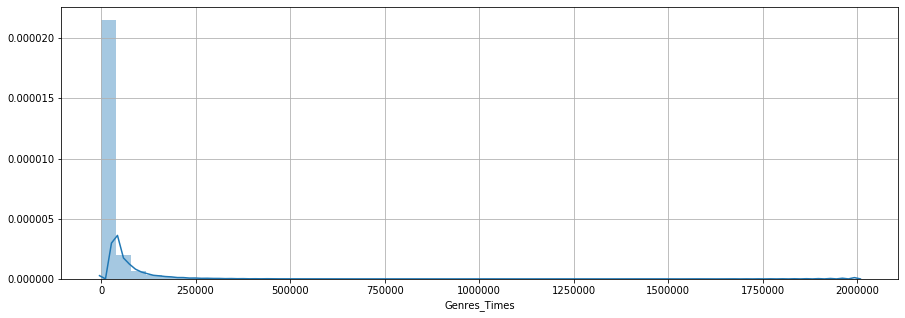

In [0]:
plt.figure(figsize=(15,5))
sns.distplot(df_genre['Genres_Times'])
plt.grid()

### Inference:
- From the above distribution plot it is clearly visible that the data is right skewed
- Thus transformation of this data is to be done

## Bivariate Analysis

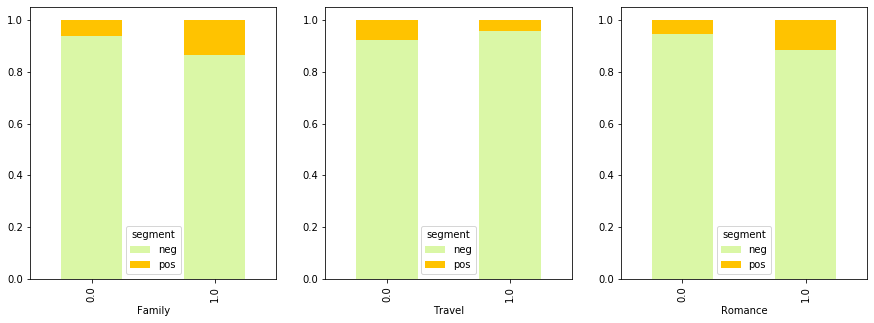

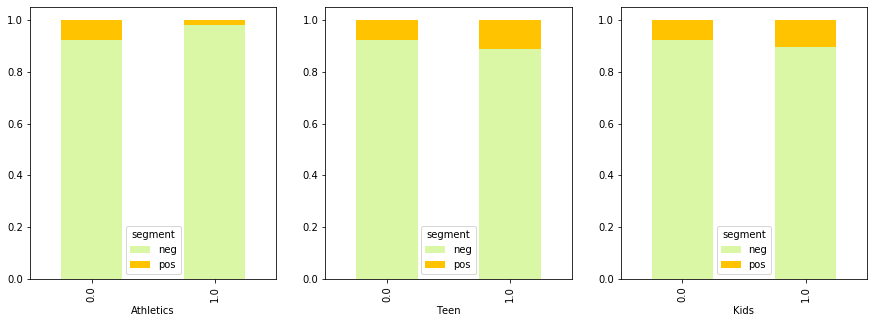

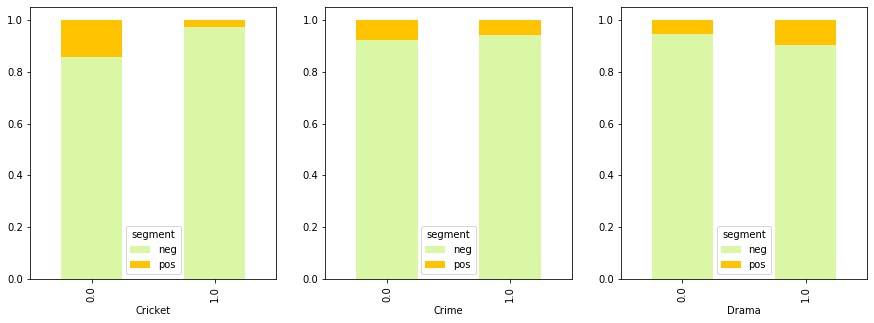

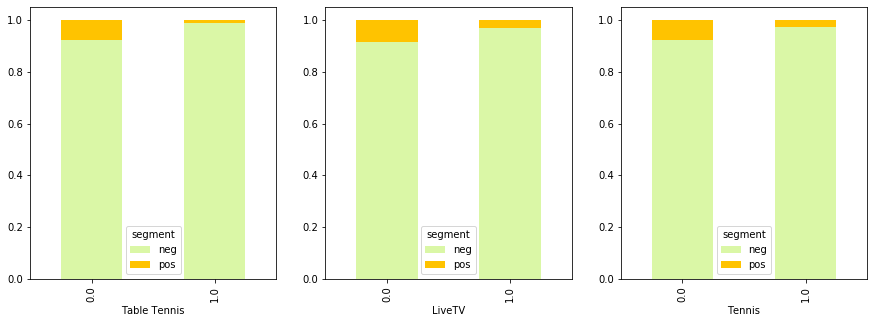

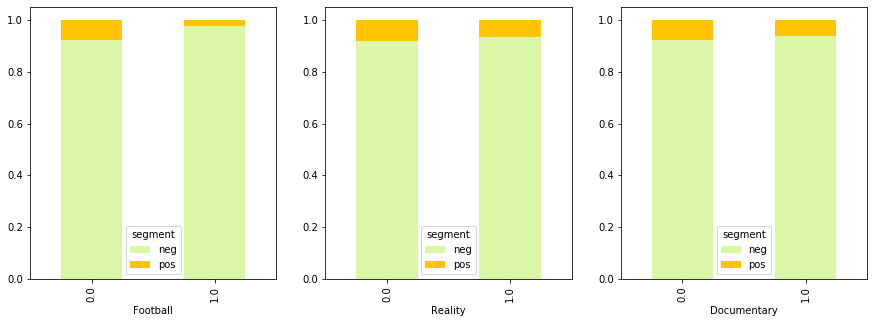

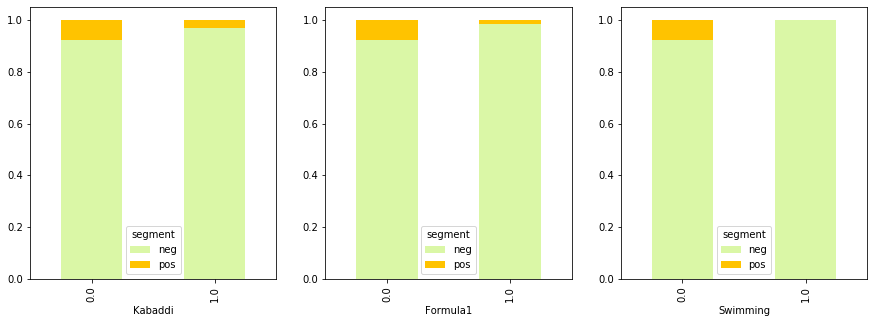

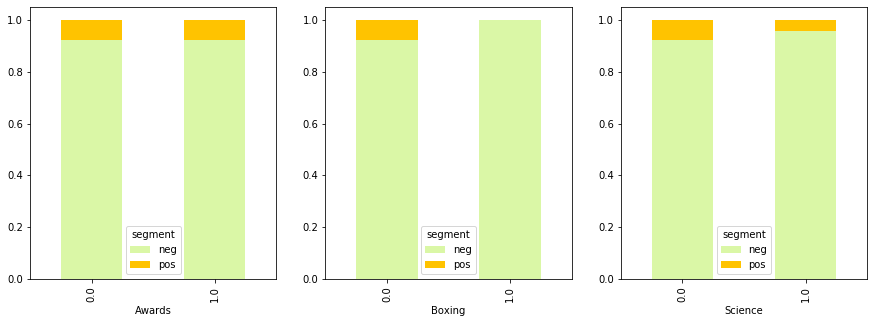

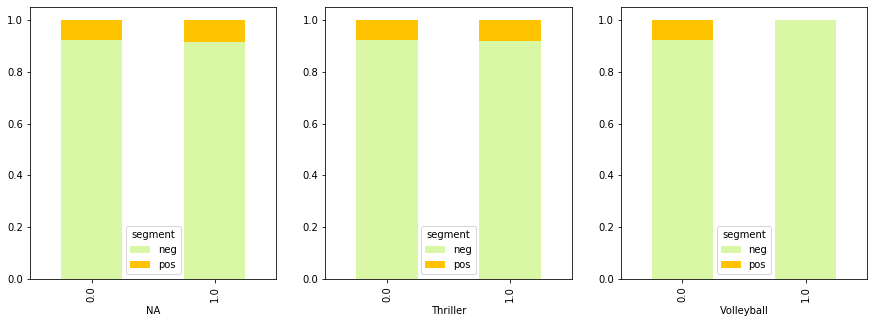

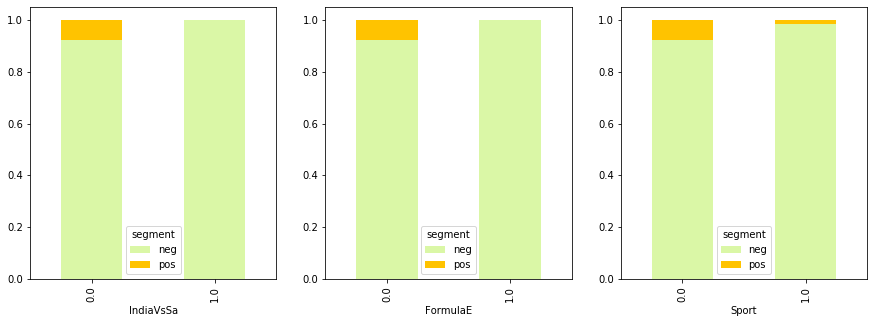

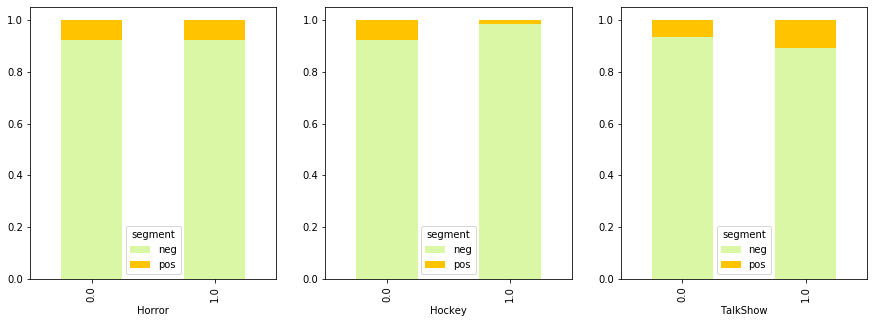

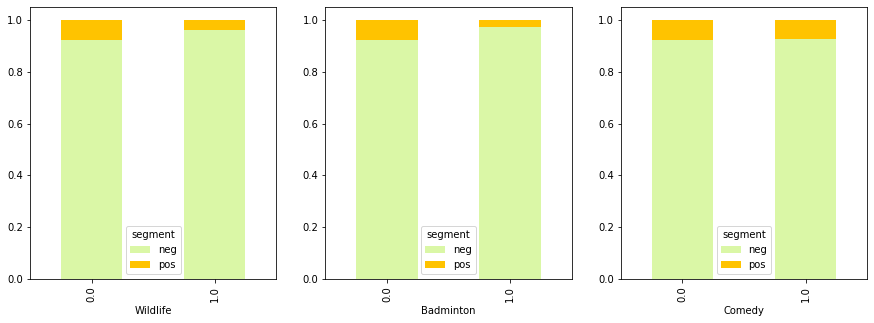

IndexError: ignored

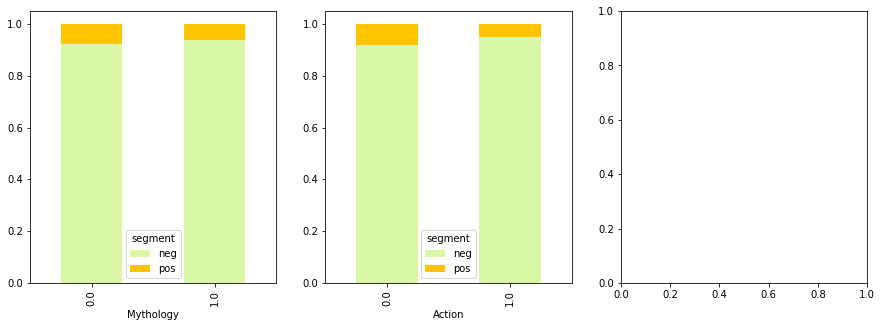

In [0]:
names=list(df_genre.iloc[:,3:-1].columns)
for i in range(0,len(names),3):
  fig,ax=plt.subplots(1,3,figsize=(15,5))
  df = pd.crosstab(df_genre[names[i]], df_genre['segment'])
  df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['#DAF7A6', '#FFC300'],ax=ax[0])


  df = pd.crosstab(df_genre[names[i+1]], df_genre['segment'])
  df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['#DAF7A6', '#FFC300'],ax=ax[1])


  df = pd.crosstab(df_genre[names[i+2]], df_genre['segment'])
  df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['#DAF7A6', '#FFC300'],ax=ax[2])
  #plt.title('Visitor Type vs Revenue', fontsize = 30)
  plt.show()

### Inference:
- From above stacked bar chart the genre of family and Romance have comparatively higher positive segment
- Genre of cricket have less higher positive on non cricket and lower conversion on cricket

In [0]:
names=['Family', 'Travel', 'Romance',
       'Athletics', 'Teen', 'Kids', 'Cricket', 'Crime', 'Drama',
       'Table Tennis', 'LiveTV', 'Tennis', 'Football', 'Reality',
       'Documentary', 'Kabaddi', 'Formula1', 'Swimming', 'Awards', 'Boxing',
       'Science', 'NA', 'Thriller', 'Volleyball', 'IndiaVsSa', 'FormulaE',
       'Sport', 'Horror', 'Hockey', 'TalkShow', 'Wildlife', 'Badminton',
       'Comedy', 'Mythology', 'Action']
genre=df_genre[names]
#print(df_genre[name[0]].groupby([df_gen['segment'],df_gen[name[0]]]).count())

In [0]:
print(df_genre[names[0]].groupby([df_genre['segment'],df_genre[names[0]]]).count())
print(df_genre[names[1]].groupby([df_genre['segment'],df_genre[names[1]]]).count())
print(df_genre[names[2]].groupby([df_genre['segment'],df_genre[names[2]]]).count())
print(df_genre[names[3]].groupby([df_genre['segment'],df_genre[names[3]]]).count())
print(df_genre[names[4]].groupby([df_genre['segment'],df_genre[names[4]]]).count())
print(df_genre[names[5]].groupby([df_genre['segment'],df_genre[names[5]]]).count())
print(df_genre[names[6]].groupby([df_genre['segment'],df_genre[names[6]]]).count())
print(df_genre[names[7]].groupby([df_genre['segment'],df_genre[names[7]]]).count())
print(df_genre[names[8]].groupby([df_genre['segment'],df_genre[names[8]]]).count())
print(df_genre[names[9]].groupby([df_genre['segment'],df_genre[names[9]]]).count())
print(df_genre[names[10]].groupby([df_genre['segment'],df_genre[names[10]]]).count())
print(df_genre[names[11]].groupby([df_genre['segment'],df_genre[names[11]]]).count())
print(df_genre[names[12]].groupby([df_genre['segment'],df_genre[names[12]]]).count())
print(df_genre[names[13]].groupby([df_genre['segment'],df_genre[names[13]]]).count())
print(df_genre[names[14]].groupby([df_genre['segment'],df_genre[names[14]]]).count())
print(df_genre[names[15]].groupby([df_genre['segment'],df_genre[names[15]]]).count())
print(df_genre[names[16]].groupby([df_genre['segment'],df_genre[names[16]]]).count())
print(df_genre[names[17]].groupby([df_genre['segment'],df_genre[names[17]]]).count())
print(df_genre[names[18]].groupby([df_genre['segment'],df_genre[names[18]]]).count())
print(df_genre[names[19]].groupby([df_genre['segment'],df_genre[names[19]]]).count())
print(df_genre[names[20]].groupby([df_genre['segment'],df_genre[names[20]]]).count())
print(df_genre[names[21]].groupby([df_genre['segment'],df_genre[names[21]]]).count())
print(df_genre[names[22]].groupby([df_genre['segment'],df_genre[names[22]]]).count())
print(df_genre[names[23]].groupby([df_genre['segment'],df_genre[names[23]]]).count())
print(df_genre[names[24]].groupby([df_genre['segment'],df_genre[names[24]]]).count())
print(df_genre[names[25]].groupby([df_genre['segment'],df_genre[names[25]]]).count())
print(df_genre[names[26]].groupby([df_genre['segment'],df_genre[names[26]]]).count())
print(df_genre[names[27]].groupby([df_genre['segment'],df_genre[names[27]]]).count())
print(df_genre[names[28]].groupby([df_genre['segment'],df_genre[names[28]]]).count())
print(df_genre[names[29]].groupby([df_genre['segment'],df_genre[names[29]]]).count())

segment  Family
neg      0.0       147114
         1.0        37631
pos      0.0         9343
         1.0         5912
Name: Family, dtype: int64
segment  Travel
neg      0.0       180779
         1.0         3966
pos      0.0        15073
         1.0          182
Name: Travel, dtype: int64
segment  Romance
neg      0.0        121675
         1.0         63070
pos      0.0          6918
         1.0          8337
Name: Romance, dtype: int64
segment  Athletics
neg      0.0          184506
         1.0             239
pos      0.0           15250
         1.0               5
Name: Athletics, dtype: int64
segment  Teen
neg      0.0     182915
         1.0       1830
pos      0.0      15021
         1.0        234
Name: Teen, dtype: int64
segment  Kids
neg      0.0     180343
         1.0       4402
pos      0.0      14751
         1.0        504
Name: Kids, dtype: int64
segment  Cricket
neg      0.0         73669
         1.0        111076
pos      0.0         12126
         1.0        

### Inference:
- From above,the higher positive value is for genre drama which is 9600.
- There is no conversion for swimming and Volleyball

## 3.EDA on Week Days

In [0]:
df_days=pd.read_csv('/content/drive/My Drive/hotstar_days_200000.csv')
df_days.head()

,Unnamed: 0,Train_ID,dow,segment,Thu,Sat,Wed,Mon,Tue,Fri,Sun,"('time_', 'Thu')","('time_', 'Sat')","('time_', 'Wed')","('time_', 'Mon')","('time_', 'Tue')","('time_', 'Fri')","('time_', 'Sun')"
0,0,train-121672,"5:482,4:3008,7:64",neg,1.0,1.0,1.0,0.0,0.0,0.0,0.0,482.0,64.0,3008.0,0.0,0.0,0.0,0.0
1,1,train-121673,"1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...",neg,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9237.0,25094.0,8503.0,12893.0,9162.0,15493.0,3257.0
2,2,train-121670,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800",neg,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7338.0,2218.0,6641.0,4659.0,2700.0,5800.0,40.0
3,3,train-121671,"1:77,2:3883,5:122",neg,1.0,0.0,0.0,1.0,0.0,0.0,1.0,122.0,0.0,0.0,3883.0,0.0,0.0,77.0
4,4,train-121676,"1:6150,3:2378",pos,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2378.0,0.0,6150.0


### Univariate analysis

In [0]:
df_days=df_days.fillna(0)

In [0]:
df_days.iloc[:,4:11].apply(lambda x:x==1).sum().sort_values(ascending=True)

Mon    112601
Sun    115826
Tue    117451
Thu    122205
Sat    122773
Fri    123738
Wed    127420
dtype: int64

## Bivariate analysis

In [0]:
print(df_days['segment'].groupby(df_days['Mon']).count())
print(df_days['segment'].groupby(df_days['Tue']).count())
print(df_days['segment'].groupby(df_days['Wed']).count())
print(df_days['segment'].groupby(df_days['Thu']).count())
print(df_days['segment'].groupby(df_days['Fri']).count())
print(df_days['segment'].groupby(df_days['Sat']).count())
print(df_days['segment'].groupby(df_days['Sun']).count())

Mon
0.0     87399
1.0    112601
Name: segment, dtype: int64
Tue
0.0     82549
1.0    117451
Name: segment, dtype: int64
Wed
0.0     72580
1.0    127420
Name: segment, dtype: int64
Thu
0.0     77795
1.0    122205
Name: segment, dtype: int64
Fri
0.0     76262
1.0    123738
Name: segment, dtype: int64
Sat
0.0     77227
1.0    122773
Name: segment, dtype: int64
Sun
0.0     84174
1.0    115826
Name: segment, dtype: int64


### Inference:
- Higher conversion happens on wednesday
- Lowest is on monday

## 4.EDA on hour of the day

In [0]:
df_days=pd.read_csv('/content/drive/My Drive/Hotstar_days_200000.csv')

In [0]:
df_days.head()

,Unnamed: 0,Train_ID,segment,tod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,total_time
0,0,train-121672,neg,"18:1372,21:1862,17:320",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.0,1372.0,0.0,0.0,1862.0,0.0,0.0,3554.0
1,1,train-121673,neg,"11:7726,10:3521,13:2067,12:3844,20:4608,21:936...",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7944.0,7419.0,9807.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0,3521.0,7726.0,3844.0,2067.0,2807.0,967.0,4438.0,5734.0,4274.0,3822.0,4608.0,9360.0,304.0,2988.0,83635.0
2,2,train-121670,neg,"11:302,10:1594,13:331,12:133,20:3802,14:3083,2...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1874.0,504.0,201.0,4388.0,1594.0,302.0,133.0,331.0,3083.0,1640.0,0.0,0.0,101.0,3683.0,3802.0,3430.0,2219.0,2111.0,29396.0
3,3,train-121671,neg,"10:122,12:77,15:1800,14:0,16:2083",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,77.0,0.0,0.0,1800.0,2083.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4082.0
4,4,train-121676,pos,"20:529,21:1257,22:4930,23:538,19:1268,18:6",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1268.0,529.0,1257.0,4930.0,538.0,8528.0


In [0]:
df_days=df_days.drop('Unnamed: 0',axis=1)

In [0]:
count=df_days.iloc[:,3:27].apply(lambda x:x==1).sum().reset_index()

### Univariate analysis


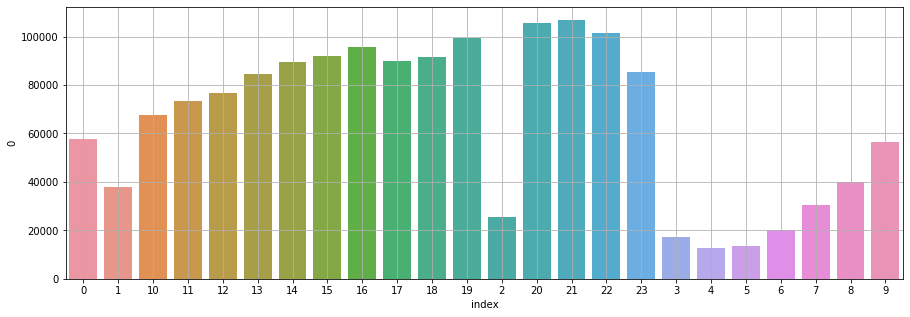

In [0]:
plt.figure(figsize=(15,5))
sns.barplot('index',0,data=count.sort_values(by='index',ascending=False))
plt.grid()

### Inference:
- The higher views is between 20 to 23
- The least view is at morning 4
- Other than that there are even good views at 11 to 19

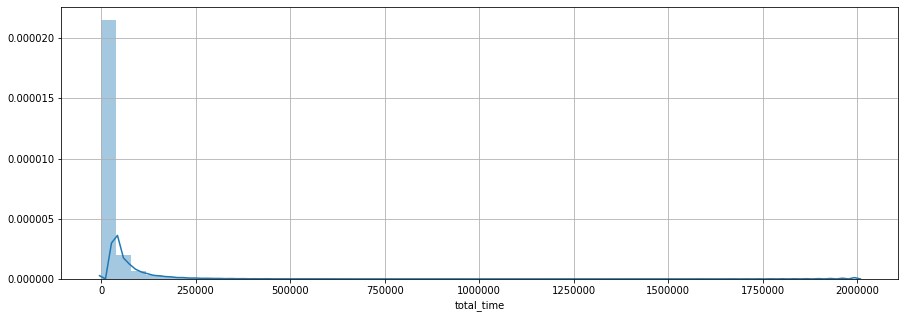

In [0]:
plt.figure(figsize=(15,5))
sns.distplot(df_days['total_time'])
plt.grid()

### Bivariate analysis

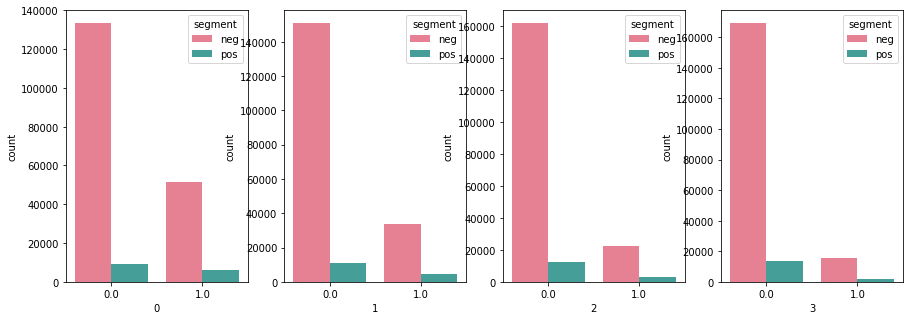

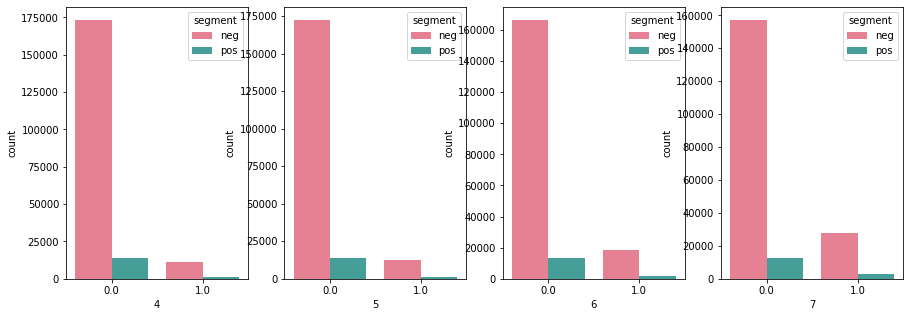

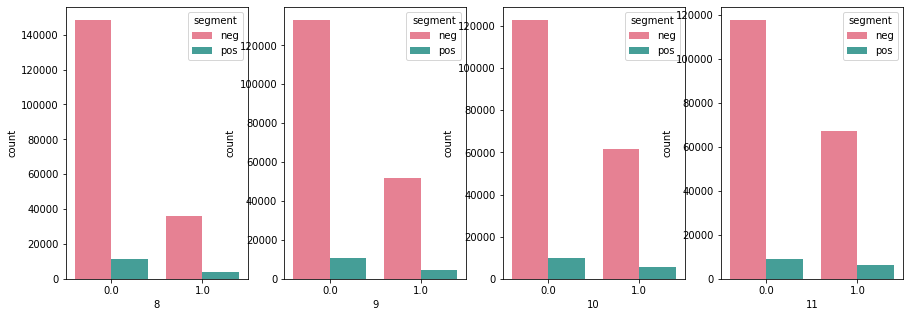

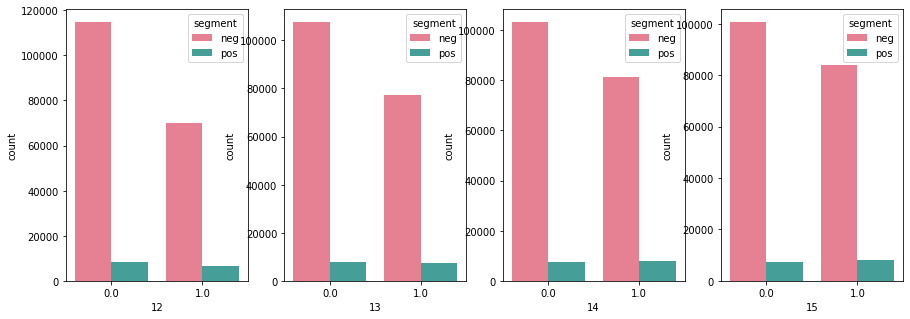

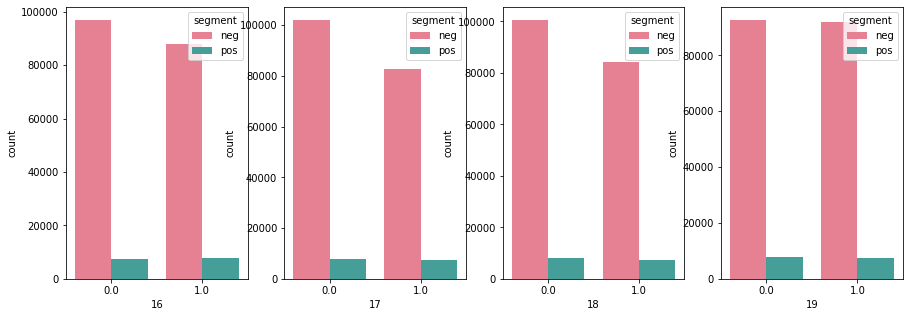

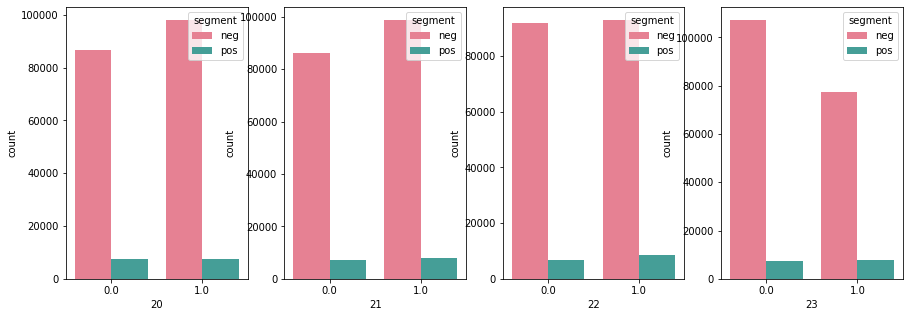

In [0]:
## Segemnt between 0 to 10
col=list(df_days.iloc[:,3:27].columns)
for i in range(0,len(col),4):
  fig,ax=plt.subplots(1,4,figsize=(15,5))
  sns.countplot(df_days[col[i]],hue=df_days['segment'],palette='husl',ax=ax[0])
  sns.countplot(df_days[col[i+1]],hue=df_days['segment'],palette='husl',ax=ax[1])
  sns.countplot(df_days[col[i+2]],hue=df_days['segment'],palette='husl',ax=ax[2])
  sns.countplot(df_days[col[i+3]],hue=df_days['segment'],palette='husl',ax=ax[3])

### Inference:
- The countplot for 20 to 23 have higher interest rate as compared to others

In [0]:
print('User interested at 0',df_days[(df_days['0']==1)&(df_days['segment']=='pos')]['0'].count())
print('User interested at 1',df_days[(df_days['1']==1)&(df_days['segment']=='pos')]['1'].count())
print('User interested at 2',df_days[(df_days['2']==1)&(df_days['segment']=='pos')]['2'].count())
print('User interested at 3',df_days[(df_days['3']==1)&(df_days['segment']=='pos')]['3'].count())
print('User interested at 4',df_days[(df_days['4']==1)&(df_days['segment']=='pos')]['4'].count())
print('User interested at 5',df_days[(df_days['5']==1)&(df_days['segment']=='pos')]['5'].count())
print('User interested at 6',df_days[(df_days['6']==1)&(df_days['segment']=='pos')]['6'].count())
print('User interested at 7',df_days[(df_days['7']==1)&(df_days['segment']=='pos')]['7'].count())
print('User interested at 8',df_days[(df_days['8']==1)&(df_days['segment']=='pos')]['8'].count())
print('User interested at 9',df_days[(df_days['9']==1)&(df_days['segment']=='pos')]['9'].count())
print('User interested at 10',df_days[(df_days['10']==1)&(df_days['segment']=='pos')]['10'].count())
print('User interested at 11',df_days[(df_days['11']==1)&(df_days['segment']=='pos')]['11'].count())
print('User interested at 12',df_days[(df_days['12']==1)&(df_days['segment']=='pos')]['12'].count())
print('User interested at 13',df_days[(df_days['13']==1)&(df_days['segment']=='pos')]['13'].count())
print('User interested at 14',df_days[(df_days['14']==1)&(df_days['segment']=='pos')]['14'].count())
print('User interested at 15',df_days[(df_days['15']==1)&(df_days['segment']=='pos')]['15'].count())
print('User interested at 16',df_days[(df_days['16']==1)&(df_days['segment']=='pos')]['16'].count())
print('User interested at 17',df_days[(df_days['17']==1)&(df_days['segment']=='pos')]['17'].count())
print('User interested at 18',df_days[(df_days['18']==1)&(df_days['segment']=='pos')]['18'].count())
print('User interested at 19',df_days[(df_days['19']==1)&(df_days['segment']=='pos')]['19'].count())
print('User interested at 20',df_days[(df_days['20']==1)&(df_days['segment']=='pos')]['20'].count())
print('User interested at 21',df_days[(df_days['21']==1)&(df_days['segment']=='pos')]['21'].count())
print('User interested at 22',df_days[(df_days['22']==1)&(df_days['segment']=='pos')]['22'].count())
print('User interested at 23',df_days[(df_days['23']==1)&(df_days['segment']=='pos')]['23'].count())

User interested at 0 6308
User interested at 1 4277
User interested at 2 2756
User interested at 3 1769
User interested at 4 1224
User interested at 5 1223
User interested at 6 1756
User interested at 7 2723
User interested at 8 3734
User interested at 9 4720
User interested at 10 5591
User interested at 11 6354
User interested at 12 6775
User interested at 13 7305
User interested at 14 7863
User interested at 15 7989
User interested at 16 7763
User interested at 17 7357
User interested at 18 7292
User interested at 19 7444
User interested at 20 7668
User interested at 21 8081
User interested at 22 8411
User interested at 23 7960


- The highest interset is at 22

## Dropping the columns NA and Unknown from main file

In [0]:
df_hotstar=pd.read_csv('/content/drive/My Drive/HOTSTAR.csv')

In [0]:
df_hotstar.iloc[:,:1362].apply(lambda x:x==1).sum().sort_values(ascending=False)

navi mumbai    72730
delhi          57928
mumbai         57460
bangalore      28669
gurgaon        24730
               ...  
campbell           1
Unnamed: 0         1
segment            0
cities             0
Train_ID           0
Length: 1362, dtype: int64

In [0]:
df_hotstar=df_hotstar.drop(['NA','Unknown'],axis=1)

In [0]:
df_hotstar=df_hotstar.fillna(0)

### Bivariate analysis:

#### Analysing top 10 cities watch patern with respect to segment,time of the day,day of the week and genre 
- Navi Mumbai
- Delhi
- Mumbai
- Bengluru
- Gurgaon
- chennai
- kolkata
- new delhi
- pune
- Bengluru

<Figure size 1080x360 with 0 Axes>

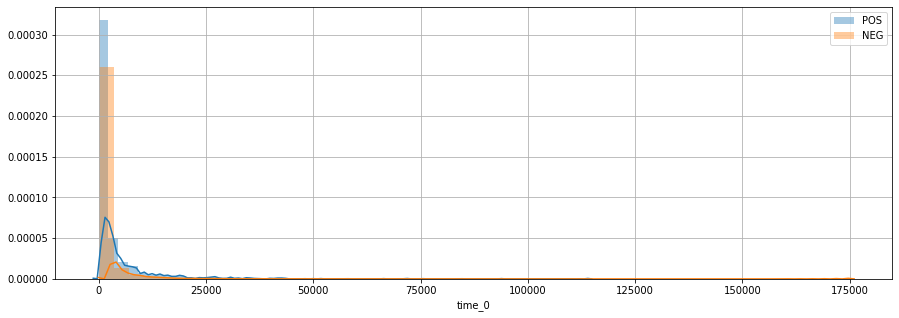

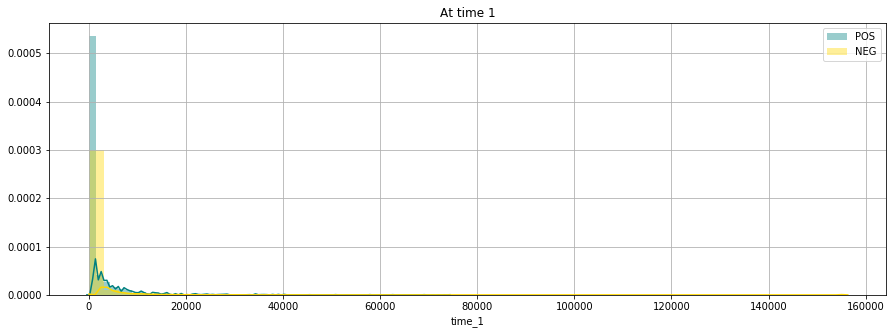

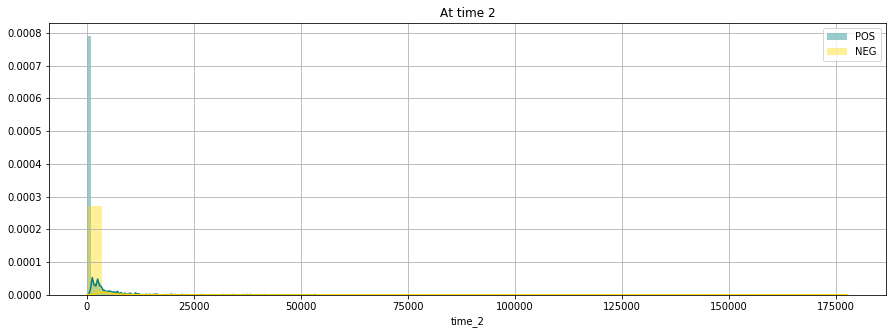

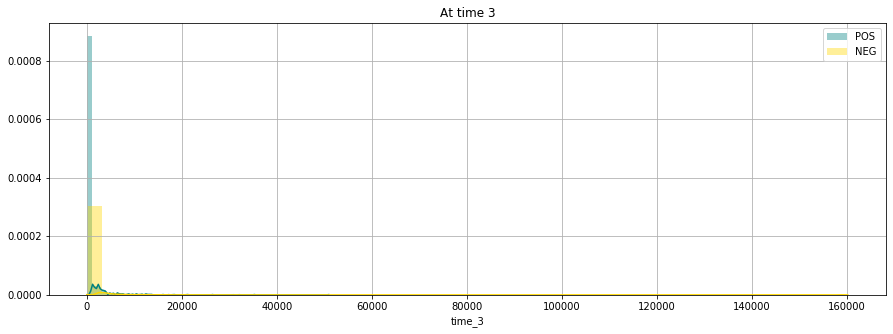

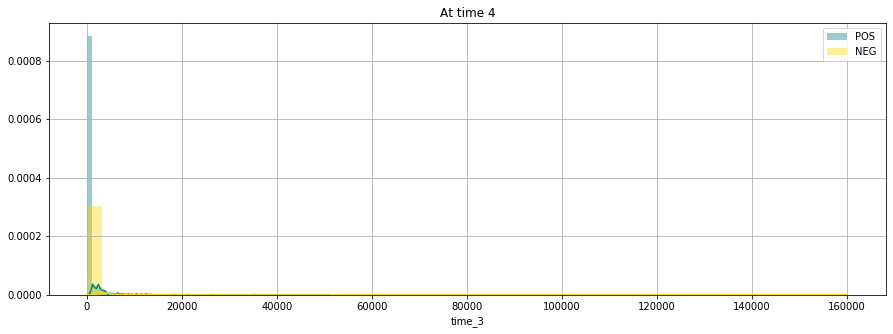

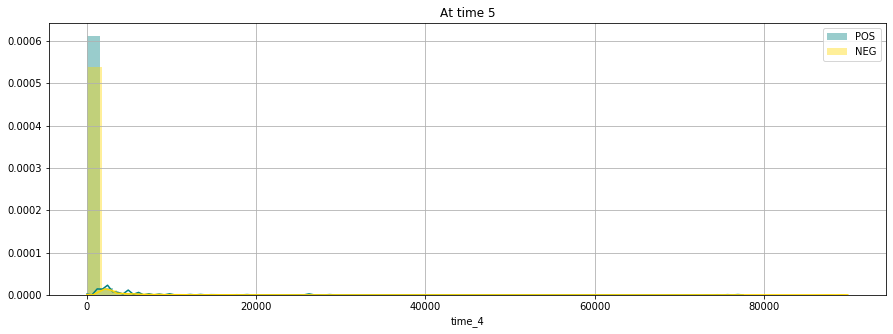

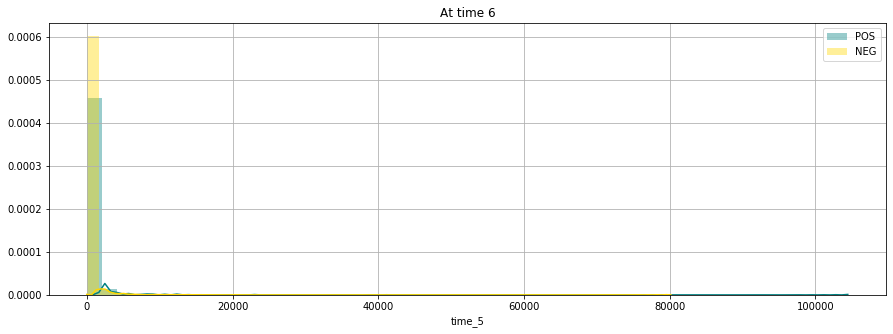

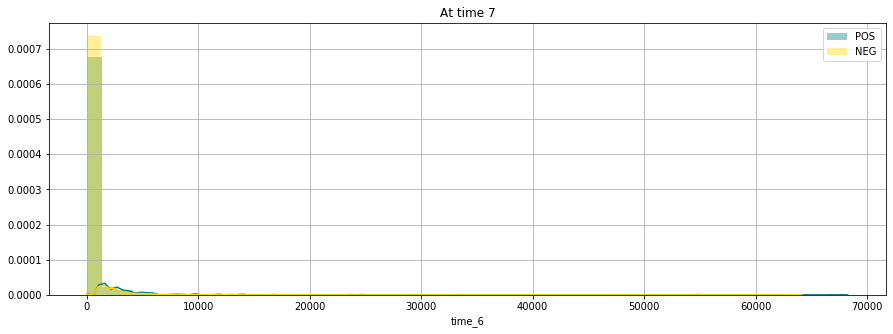

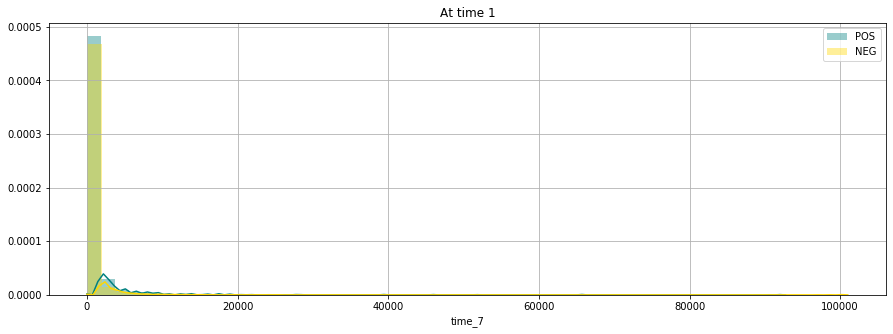

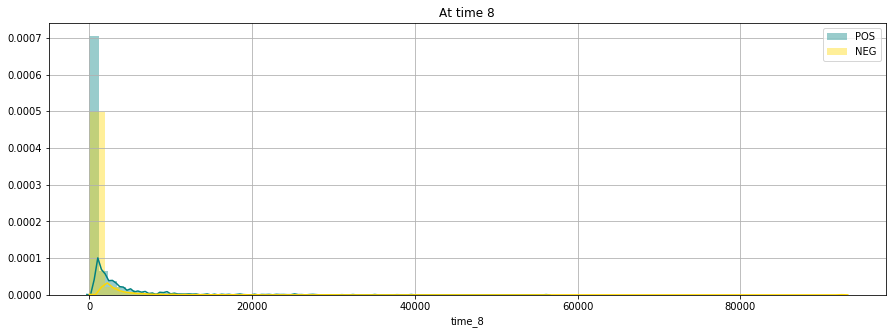

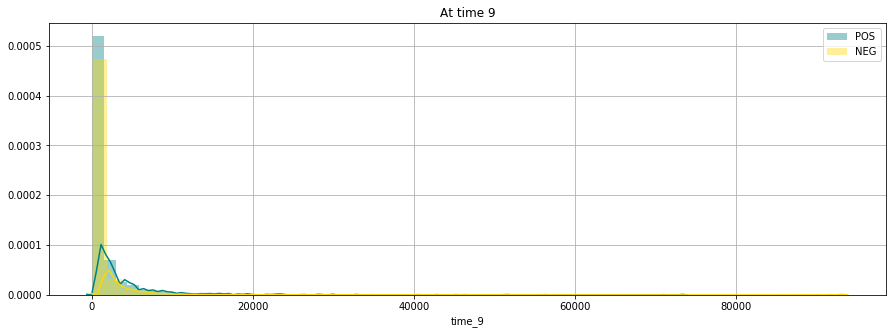

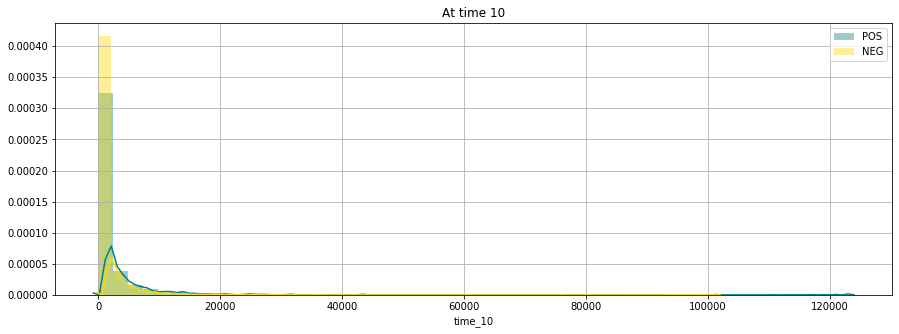

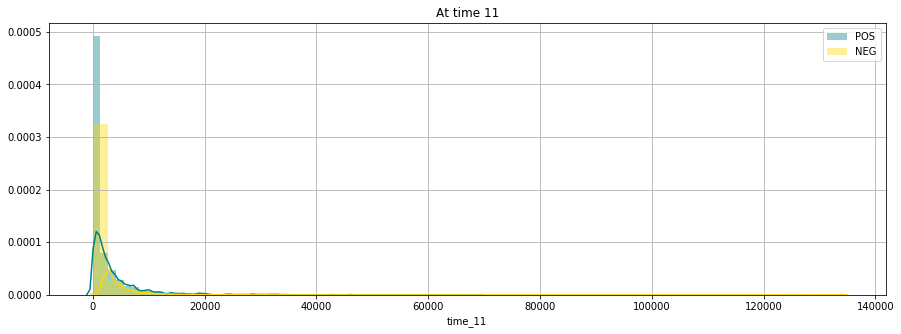

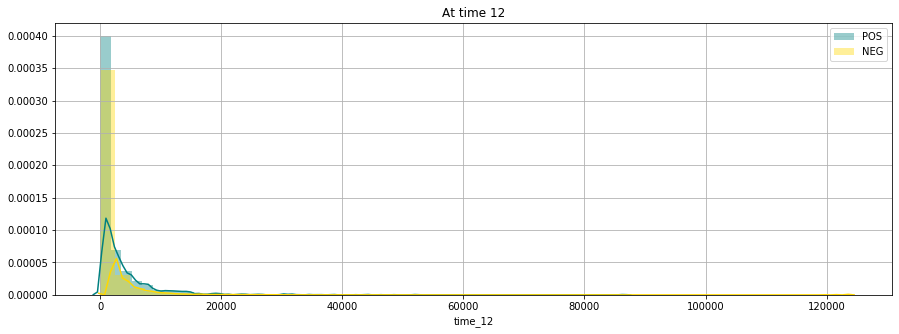

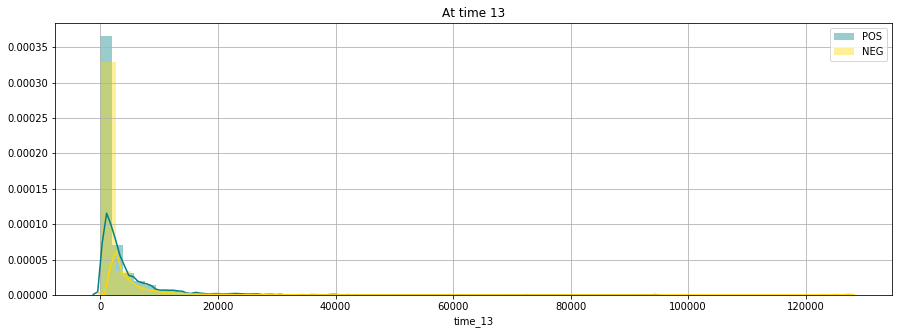

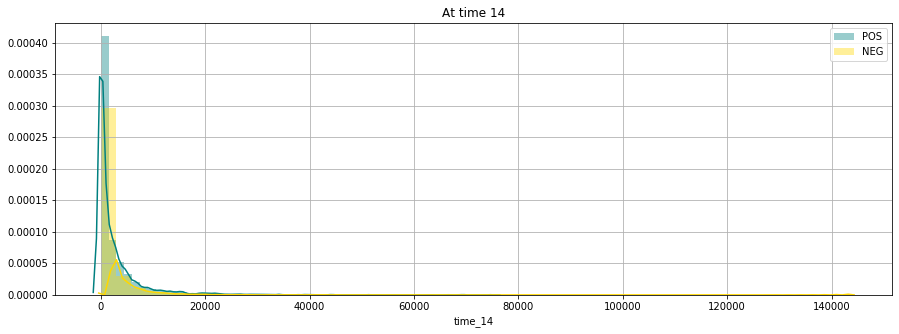

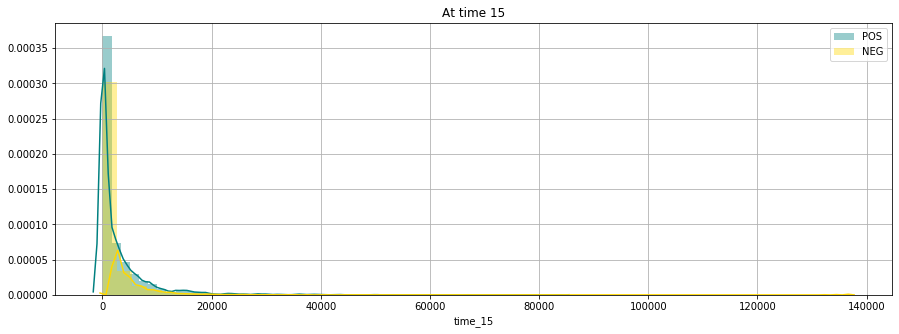

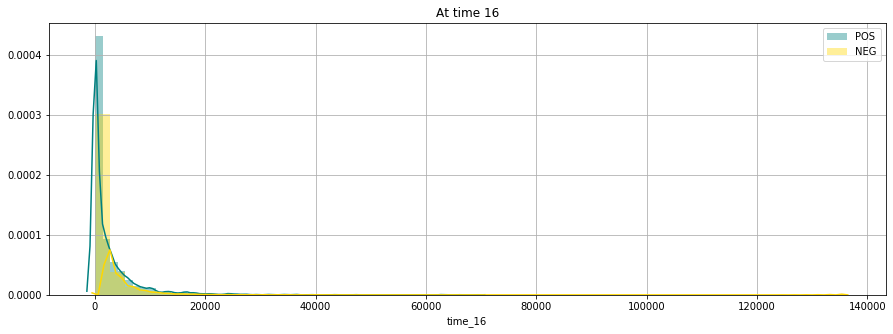

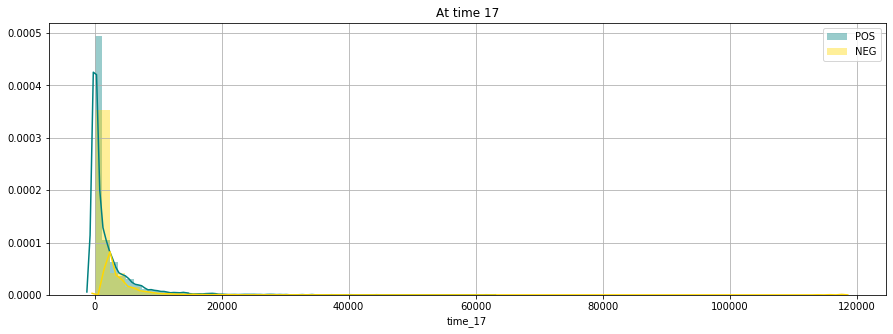

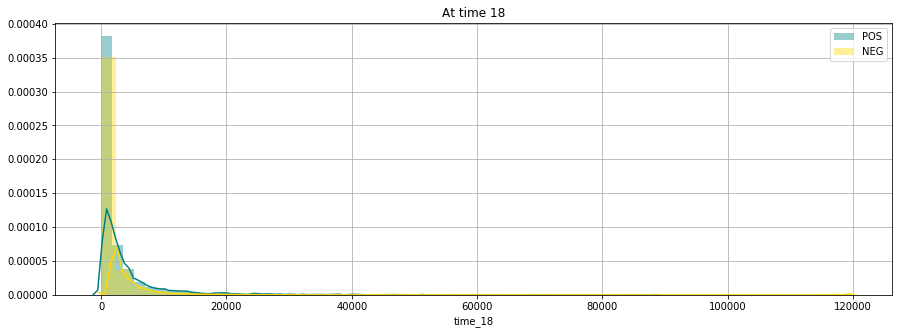

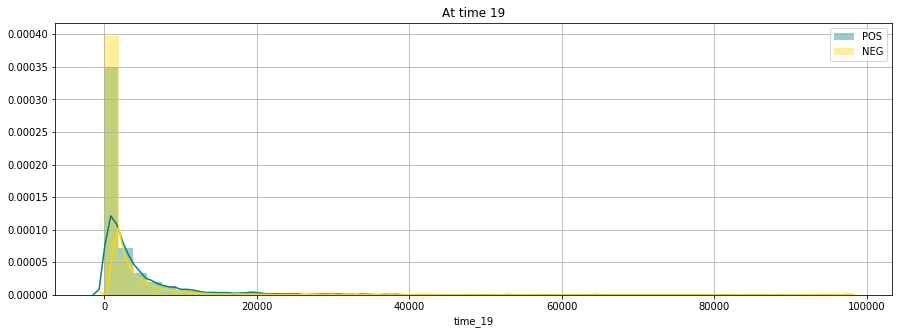

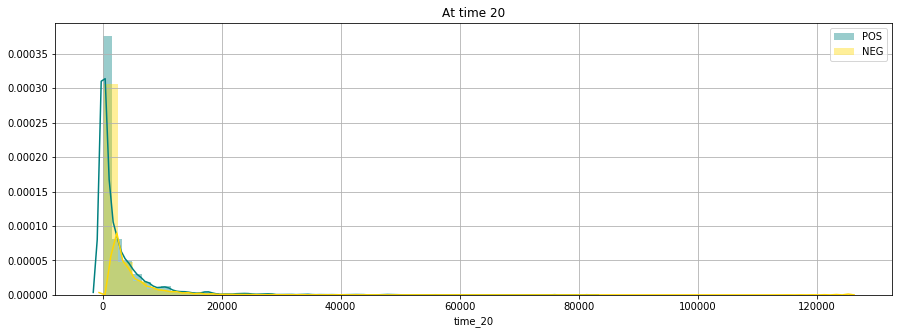

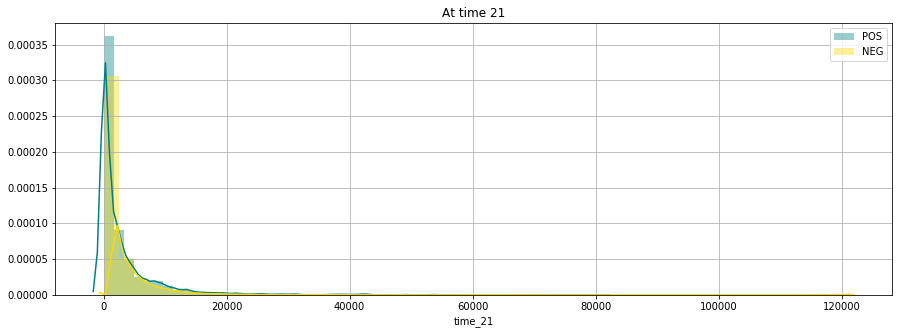

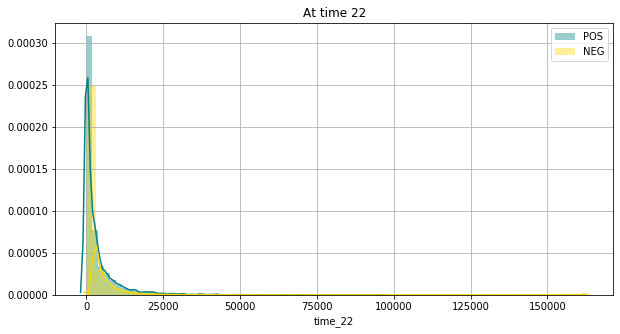

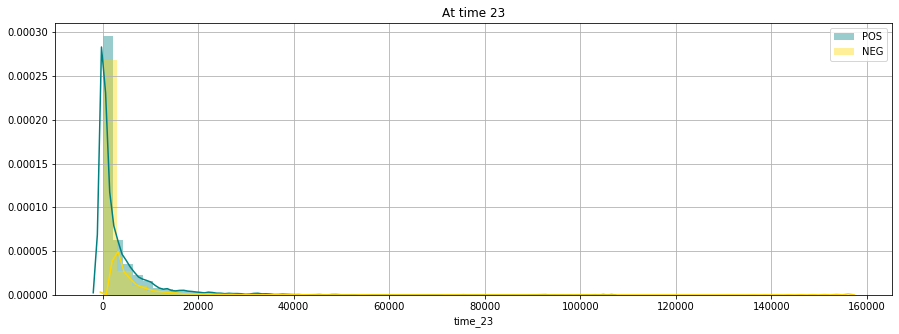

In [0]:
# Extracting navi mumbai data
navi_mumbai=df_hotstar[(df_hotstar['navi mumbai']==1)&((df_hotstar['Sun']==1)|(df_hotstar['Sat']==1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekend
morning=navi_mumbai.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 4')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

### Inference:
- From the above plot for the city of navi mumbai it can be inferred that on weekend at midnight have pretty good postive interest and gradually decrease till morning.
- The interest of user seems to be positive higher at the evening.
- The ohighest positive inteest is been viewed between 20 to 23

<Figure size 1080x360 with 0 Axes>

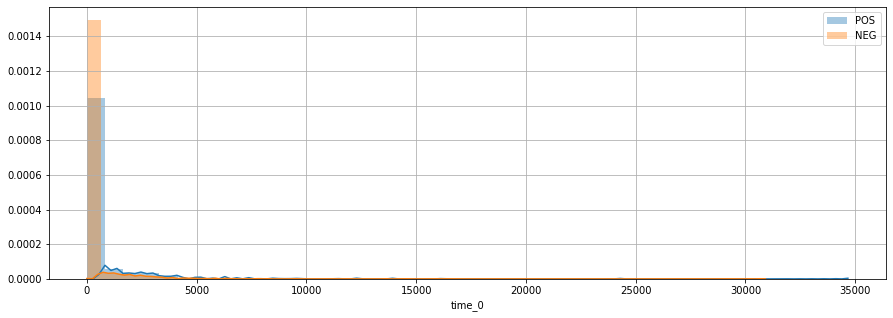

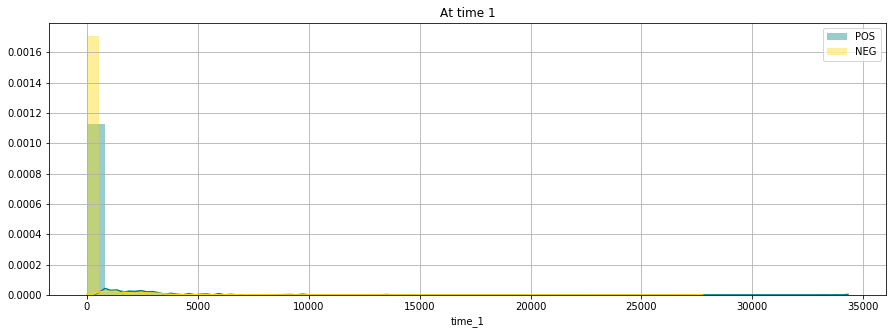

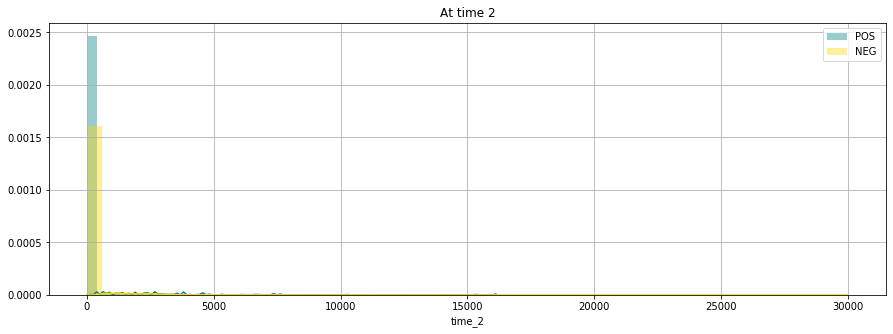

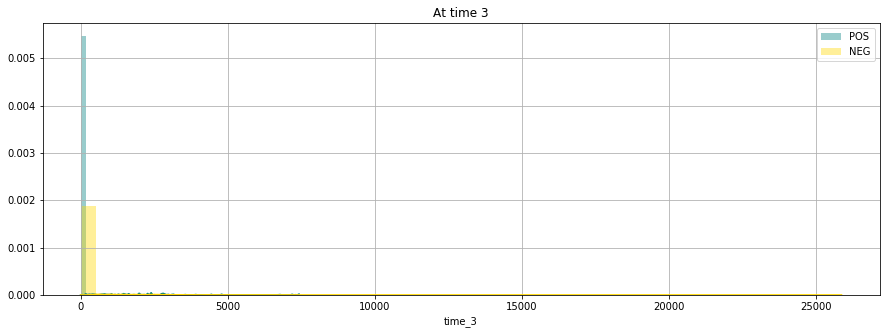

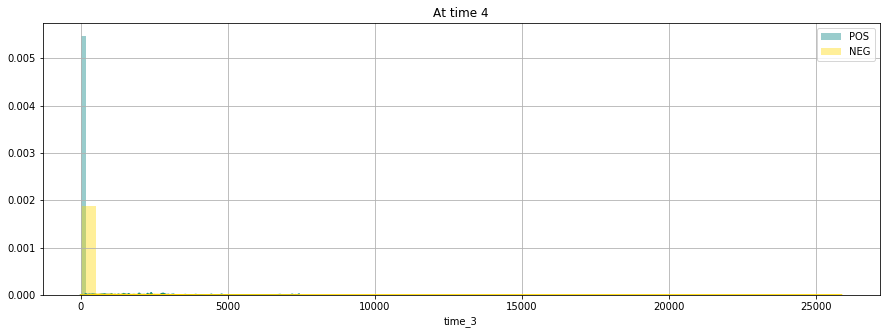

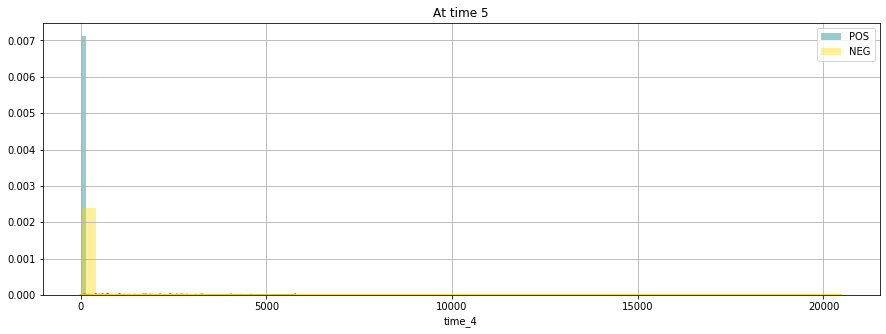

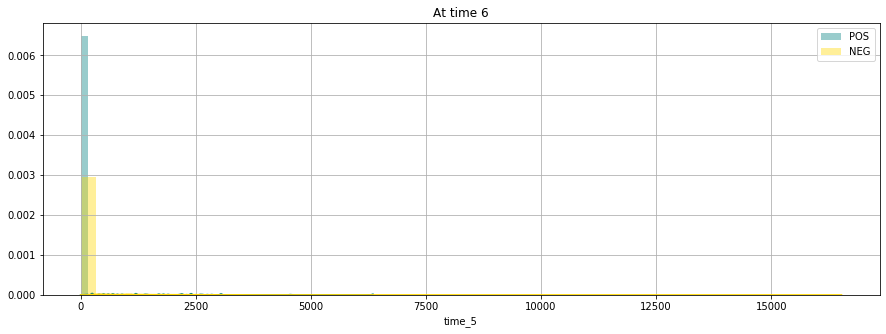

In [0]:
# Extracting navi mumbai data
navi_mumbai=df_hotstar[(df_hotstar['navi mumbai']==1)&((df_hotstar['Sun']!=1)|(df_hotstar['Sat']!=1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=navi_mumbai.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 4')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

### Inference:
- The plots for weekdays of watchpattern for the people in navi mumbai reveals that people tend to have less likely positive interest as in weekends
- People seems to have some more positive interest at 13 which could be lunch break where people could be using hotstar and these could be people of working group

<Figure size 1080x360 with 0 Axes>

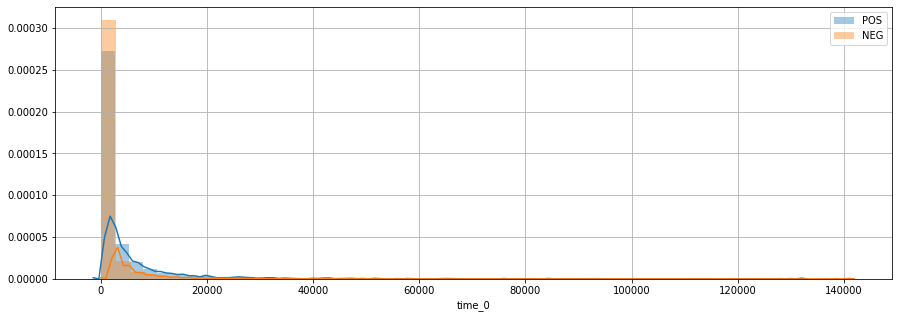

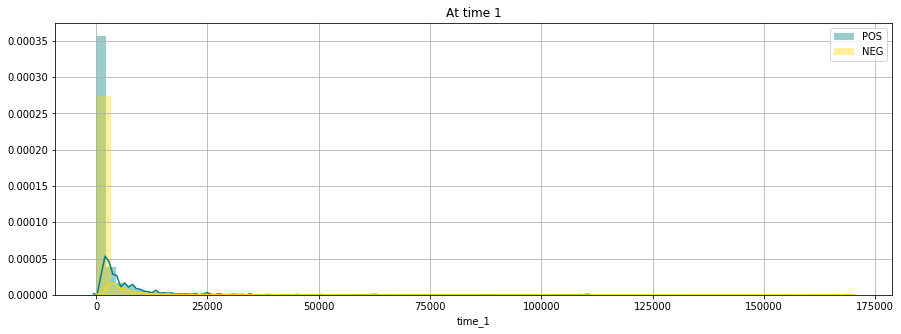

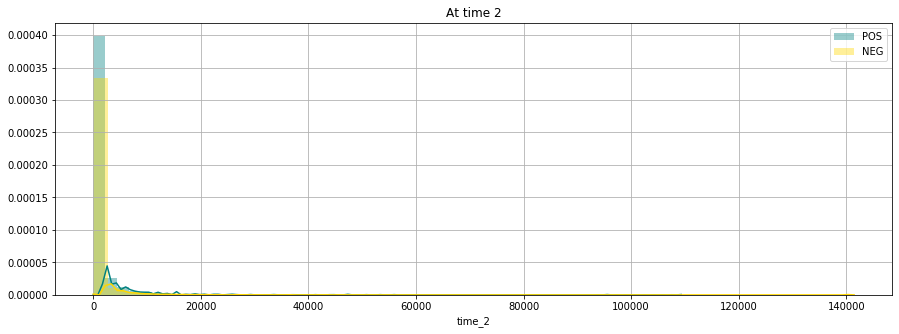

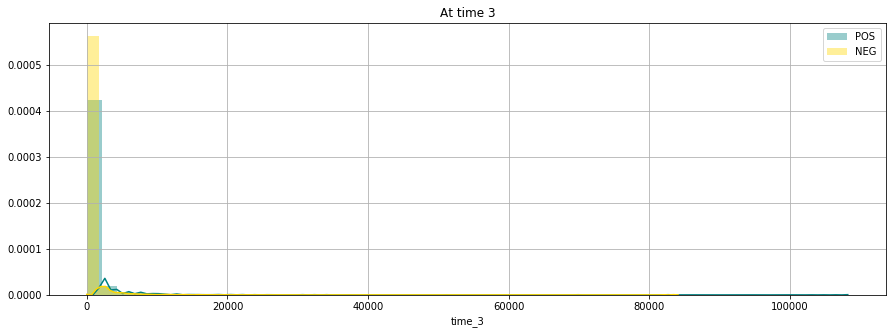

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['delhi']==1)&((df_hotstar['Sun']==1)|(df_hotstar['Sat']==1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['delhi']==1)&((df_hotstar['Sun']!=1)|(df_hotstar['Sat']!=1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['banglore']==1)&((df_hotstar['Sun']==1)|(df_hotstar['Sat']==1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['banglore']==1)&((df_hotstar['Sun']!=1)|(df_hotstar['Sat']!=1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['gurgaon']==1)&((df_hotstar['Sun']==1)|(df_hotstar['Sat']==1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['chennai']==1)&((df_hotstar['Sun']==1)|(df_hotstar['Sat']==1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['chennai']==1)&((df_hotstar['Sun']!=1)|(df_hotstar['Sat']!=1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['chennai']==1)&((df_hotstar['Sun']==1)|(df_hotstar['Sat']==1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['kolkata']==1)&((df_hotstar['Sun']==1)|(df_hotstar['Sat']==1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['kolkata']==1)&((df_hotstar['Sun']!=1)|(df_hotstar['Sat']!=1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

In [0]:
# Extracting Delhi data
delhi=df_hotstar[(df_hotstar['chennai']==1)&((df_hotstar['Sun']==1)|(df_hotstar['Sat']==1))]

# Distribution
plt.figure(figsize=(15,5))
# watch pattern of people in navi mumbai at weekdays
morning=delhi.copy()

# at 0
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_0'],label='POS')
sns.distplot(morning[morning['segment']=='neg']['time_0'],label='NEG')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_1'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_1'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 2
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_2'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_2'],label='NEG',color='gold')
plt.title('At time 2')
plt.grid()
plt.legend()
plt.show()

# at 3
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_3'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_3'],label='NEG',color='gold')
plt.title('At time 3')
plt.grid()
plt.legend()
plt.show()

# at 4
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_4'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_4'],label='NEG',color='gold')
plt.title('At time 5')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_5'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_5'],label='NEG',color='gold')
plt.title('At time 6')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_6'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_6'],label='NEG',color='gold')
plt.title('At time 7')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_7'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_7'],label='NEG',color='gold')
plt.title('At time 1')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_8'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_8'],label='NEG',color='gold')
plt.title('At time 8')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_9'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_9'],label='NEG',color='gold')
plt.title('At time 9')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_10'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_10'],label='NEG',color='gold')
plt.title('At time 10')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_11'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_11'],label='NEG',color='gold')
plt.title('At time 11')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_12'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_12'],label='NEG',color='gold')
plt.title('At time 12')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_13'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_13'],label='NEG',color='gold')
plt.title('At time 13')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_14'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_14'],label='NEG',color='gold')
plt.title('At time 14')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_15'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_15'],label='NEG',color='gold')
plt.title('At time 15')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_16'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_16'],label='NEG',color='gold')
plt.title('At time 16')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_17'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_17'],label='NEG',color='gold')
plt.title('At time 17')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_18'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_18'],label='NEG',color='gold')
plt.title('At time 18')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_19'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_19'],label='NEG',color='gold')
plt.title('At time 19')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_20'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_20'],label='NEG',color='gold')
plt.title('At time 20')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_21'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_21'],label='NEG',color='gold')
plt.title('At time 21')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(10,5))
sns.distplot(morning[morning['segment']=='pos']['time_22'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_22'],label='NEG',color='gold')
plt.title('At time 22')
plt.grid()
plt.legend()
plt.show()

# at 1
plt.figure(figsize=(15,5))
sns.distplot(morning[morning['segment']=='pos']['time_23'],label='POS',color='teal')
sns.distplot(morning[morning['segment']=='neg']['time_23'],label='NEG',color='gold')
plt.title('At time 23')
plt.grid()
plt.legend()
plt.show()

## Dropping unnecessary columns

In [0]:
df_hotstar=df_hotstar.drop(['Unnamed: 0','cities','genres','dow'],axis=1)

### Applying apriori algorithm to check which association gives positive results

In [0]:
from mlxtend.frequent_patterns import apriori, association_rules 

In [0]:

# Building the model 
frq_items = apriori(df_hotstar.drop(['Train_ID','segment','Genres_Times','Day_Times','City_Times','Avg_Time'],axis=1), min_support = 0.05, use_colnames = True)

# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

                                              antecedents  ... conviction
551676  (Tue, Sat, Drama, Thu, Mon, Romance, Reality, ...  ...  18.837353
549634  (Tue, Sat, Drama, Thu, Family, Mon, Romance, F...  ...  17.512411
549631  (Tue, Sat, Drama, Mon, Family, Wed, Romance, F...  ...  17.929714
525673   (Tue, Sat, Thu, Mon, Romance, Reality, Fri, Sun)  ...  16.600848
535869  (Tue, Sat, Drama, Thu, Mon, Romance, Reality, ...  ...  16.405632

[5 rows x 9 columns]


In [0]:
rules.sort_values(by='conviction',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
551676,"(Tue, Sat, Drama, Thu, Mon, Romance, Reality, ...",(Wed),0.056320,0.637100,0.055235,0.980735,1.539374,0.019354,18.837353
549631,"(Tue, Sat, Drama, Mon, Family, Wed, Romance, F...",(Thu),0.070525,0.611025,0.068995,0.978306,1.601089,0.025902,17.929714
549634,"(Tue, Sat, Drama, Thu, Family, Mon, Romance, F...",(Wed),0.070455,0.637100,0.068995,0.979278,1.537086,0.024108,17.512411
551673,"(Tue, Sat, Wed, Drama, Mon, Romance, Reality, ...",(Thu),0.056515,0.611025,0.055235,0.977351,1.599527,0.020703,17.174158
525673,"(Tue, Sat, Thu, Mon, Romance, Reality, Fri, Sun)",(Wed),0.068160,0.637100,0.066670,0.978140,1.535300,0.023245,16.600848


In [0]:
rules.iloc[0,0]

frozenset({'Drama',
           'Fri',
           'Mon',
           'Reality',
           'Romance',
           'Sat',
           'Sun',
           'Thu',
           'Tue'})

(200000, 2853)